In [7]:
# coding: utf-8

"""
This file contains the feature engineering part for useful commints classification
"""
from __future__ import unicode_literals

import os
import codecs
import pandas as pd
import numpy as np
import scipy as sp
# from topic_decomp.NMF import create_tfidf
PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
def create_tfidf(txt):
    """
    Creates the tf-idf representation of the text
    """
    vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1, 1), max_features=None, norm='l2') #max_features entre 300 et 500 (jusqu'à 1000)
    tfidf = vectorizer.fit_transform(txt)
    feature_names = vectorizer.get_feature_names()
    print("Created document-term matrix of size %d x %d" % (tfidf.shape[0], tfidf.shape[1]))
    return tfidf, feature_names

In [60]:
reviews_filepath = os.path.join(PATH, "topic_decomp", "review_txt.txt")
processed_reviews_filepath = os.path.join(PATH, "topic_decomp", "preprocess_output", "final_review_txt.txt")
reviews_txt = codecs.open(reviews_filepath, 'r', encoding='utf-8').readlines()
processed_reviews_txt = codecs.open(processed_reviews_filepath, 'r', encoding='utf-8').readlines()

tfidf, feature_names = create_tfidf(reviews_txt)
print('tfidf', tfidf.shape)
print('reviews', len(reviews_txt))

# #%% create pandas data frame for reviews/features

df = pd.DataFrame({"reviews": reviews_txt})
df = df.assign(len_review=[len(r.split()) for r in processed_reviews_txt])

len_review = pd.DataFrame([len(r.split()) for r in processed_reviews_txt])

tf = pd.DataFrame(tfidf.todense())
n_features = pd.concat([len_review, tf], axis=1, ignore_index=True)

print(n_features.shape)
n_features.head(5)

Created document-term matrix of size 6706 x 6655
tfidf (6706, 6655)
reviews 6706
(6706, 6656)


,0,1,2,3,4,5,6,7,8,9,...,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# len_review[len_review[0]<20]
df = pd.DataFrame(reviews_txt)
df[len_review[0]<1]
reviews_txt[62]
# processed_reviews_txt[62]

'Bonne tenue des cheveux mais ne colle pas.\r\n'

In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as pl

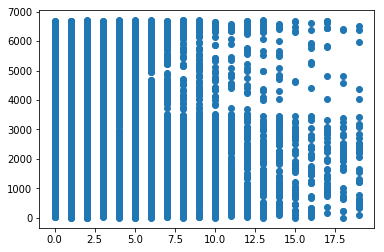

In [25]:
# pca = PCA(n_components=2).fit(n_features)
# pca_2d = pca.transform(n_features)
# pl.figure('Reference Plot')
# pl.scatter(pca_2d[:, 0], pca_2d[:, 1])
pl.scatter(len_review[len_review[0]<20], y=len_review[len_review[0]<20].index.values.tolist())


In [73]:
kmeans = KMeans(n_clusters=2, random_state=111)
test = tf[len_review[0]<2]
kmeans.fit(test)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

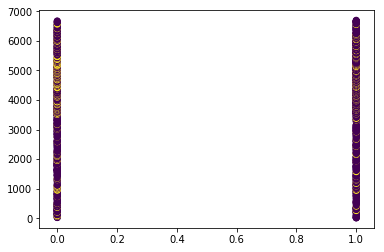

In [82]:
pl.figure('K-means with 2 clusters')
# pl.scatter(len_review, y=len_review.index.values.tolist(), c=kmeans.labels_)
# pl.show()
pl.scatter(len_review[len_review[0]<2], y=test.index.values.tolist(), c=kmeans.labels_)
pl.show()
